In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

sns.set_style("ticks")
# sns.set_style("white")
# sns.set_style("whitegrid")

In [2]:
photoz_table = pd.read_csv("tables_photozs/hydra_probgal0.7.csv", usecols=['RA', 'DEC', 'zml', 'odds', 
                                                                       'PROB_GAL', 'r_petro', 'g_petro'])

In [3]:
ra_pz = photoz_table["RA"]
dec_pz = photoz_table["DEC"]
zml = photoz_table["zml"]
odds = photoz_table["odds"]
prob_gal = photoz_table["PROB_GAL"]
r_petro = photoz_table["r_petro"]
g_petro = photoz_table["g_petro"]

In [4]:
#Defining the center of Hydra (in degress)
ra_0 = 159.17
dec_0 = -27.524

#Defining the radius of 1R200 around the center (in degrees)
#R200 = 1.4Mpc + scale of 0.247 Kpc/" ==> radius = 1.5744º
radius = 1.5744

def dist(ra, dec):
    return np.sqrt((ra - ra_0)**2 + (dec - dec_0)**2)

#Defining a mask for the objects inside 1R200
distances = dist(ra_pz, dec_pz)

findfont: Font family ['fantasy'] not found. Falling back to DejaVu Sans.


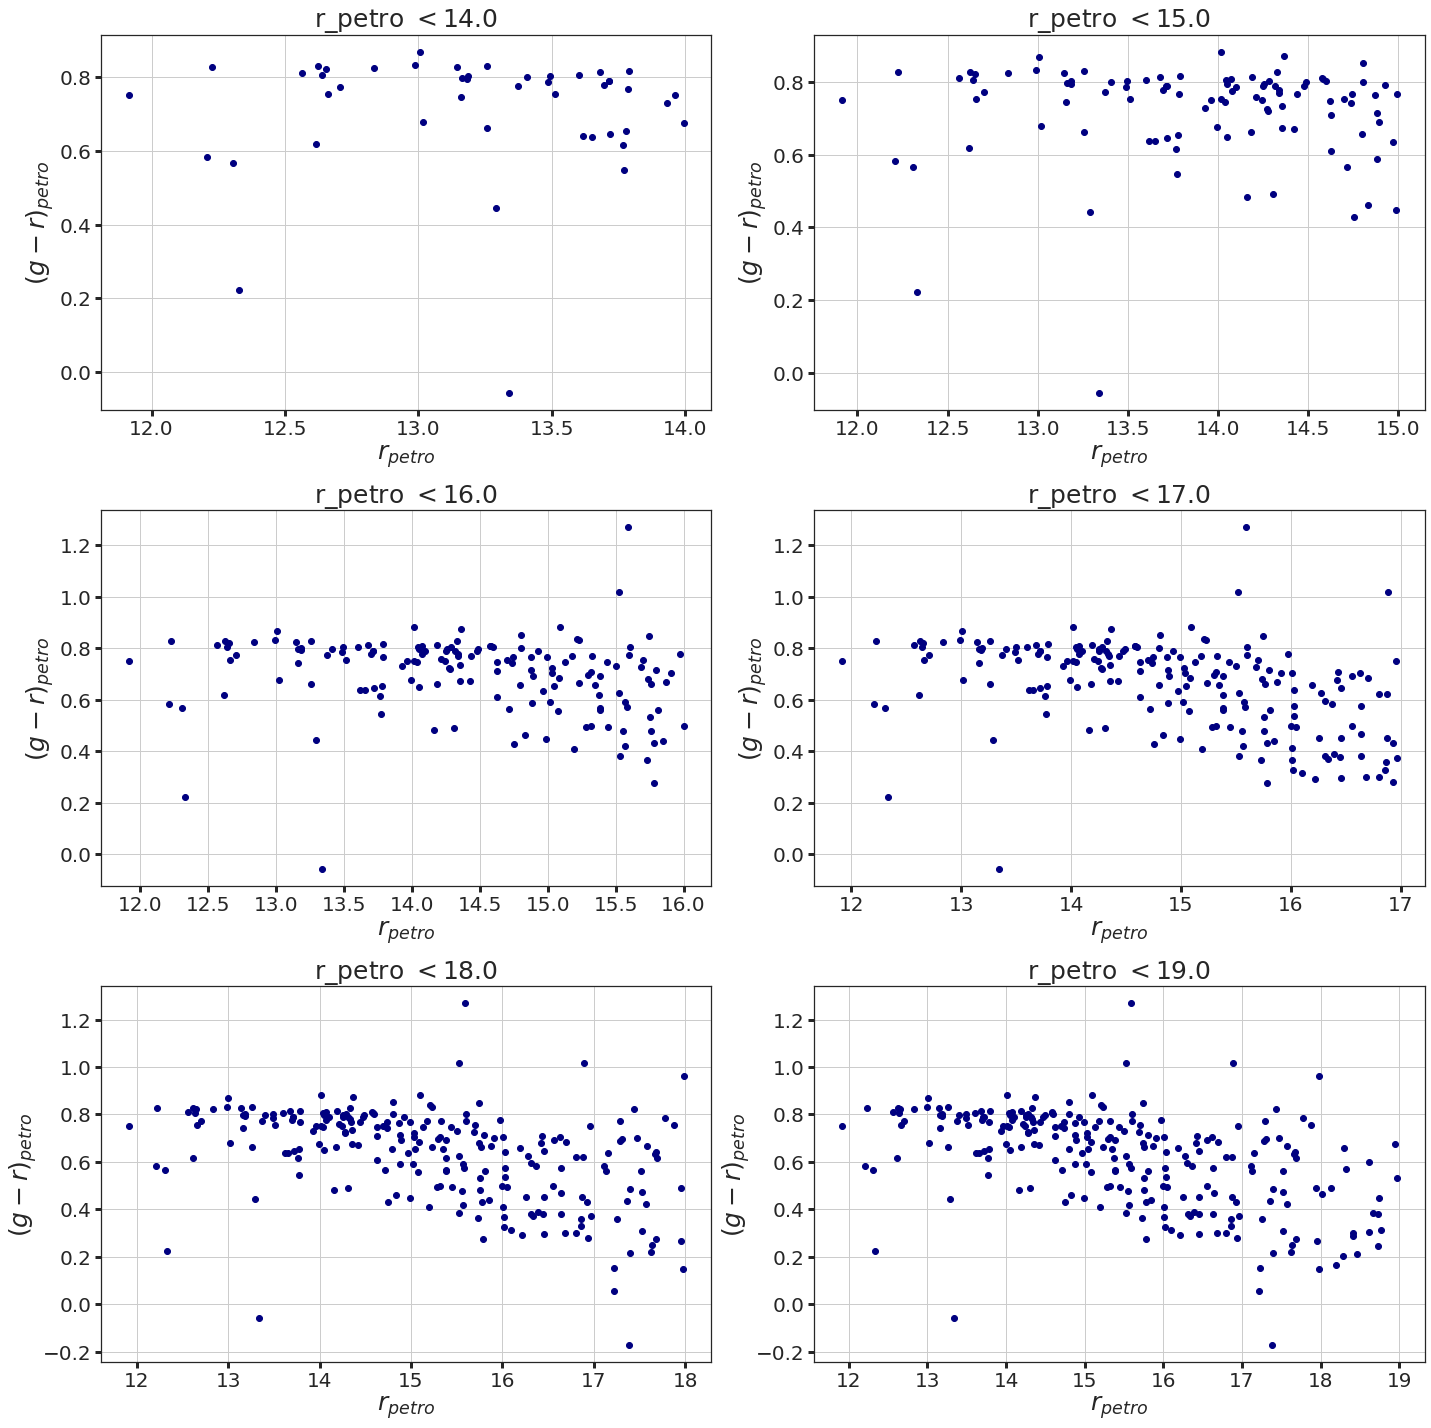

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

#Aqui faço um loop pra ir mudando a magnitude limite a cada plot
for ax, mlim in zip(axs.ravel(), [14, 15, 16, 17, 18, 19]):
    
    mask = (distances < radius) & (odds > 0.8) & (prob_gal > 0.8) & (zml > 0.0) & (zml < 0.03) & (r_petro < mlim)
    
    ax.scatter(r_petro[mask], g_petro[mask] - r_petro[mask], marker='o', color='navy')
    
    ax.set_title("r_petro $< {:.1f}$".format(mlim), fontsize=25, fontname='fantasy')
    ax.set_xlabel(r"$r_{petro}$", fontsize=25)
    ax.set_ylabel(r"$(g-r)_{petro}$", fontsize=25)
    
    ax.yaxis.set_tick_params(labelsize=20, width=3)
    ax.xaxis.set_tick_params(labelsize=20, width=3)
    
    ax.grid()
    
fig.tight_layout()
plt.savefig("../Figures/color-magnitude-diagrams3.pdf", format='pdf')

## Color-magnitude diagram up to r_petro = 19

findfont: Font family ['fantasy'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'fantasy' not found because none of the following families were found: Chicago, Charcoal, Impact, Western, Humor Sans, xkcd, fantasy


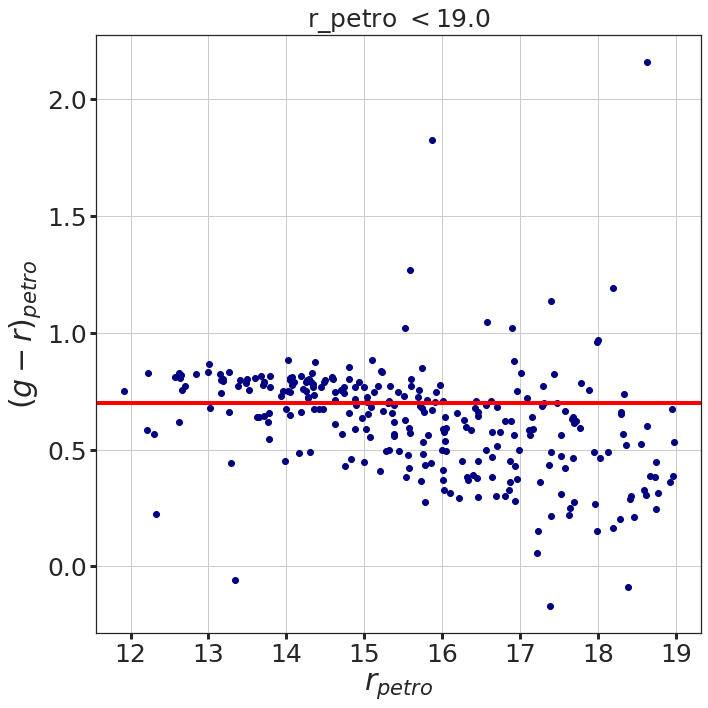

In [5]:
mlim = 19
fontsize=30
labelsize=25

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
  
mask = (distances < radius) & (odds > 0.7) & (prob_gal > 0.8) & (zml > 0.0) & (zml < 0.03) & (r_petro < mlim)

ax.scatter(r_petro[mask], g_petro[mask] - r_petro[mask], marker='o', color='navy')

ax.set_title("r_petro $< {:.1f}$".format(mlim), fontsize=25, fontname='fantasy')
ax.set_xlabel(r"$r_{petro}$", fontsize=fontsize)
ax.set_ylabel(r"$(g-r)_{petro}$", fontsize=fontsize)
ax.axhline(0.7, color="red", linewidth=4.0)

ax.yaxis.set_tick_params(labelsize=labelsize, width=3)
ax.xaxis.set_tick_params(labelsize=labelsize, width=3)

ax.grid()
    
fig.tight_layout()
plt.savefig("../Presentations&reports/relatorio-2022.2/color-magnitude-diagram.png", format='png')